In [19]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random

In [20]:
from fairPCA import StreamingFairBlockPCA
Algo = StreamingFairBlockPCA(
        data_dim=30,
        probability=0.5,
        rank=10,  # effective rank of Sigma_gap
        eps=0.3,
        mu_scale=2,
        max_cov_eig0=4,
        max_cov_eig1=2,
        seed=2023
    )

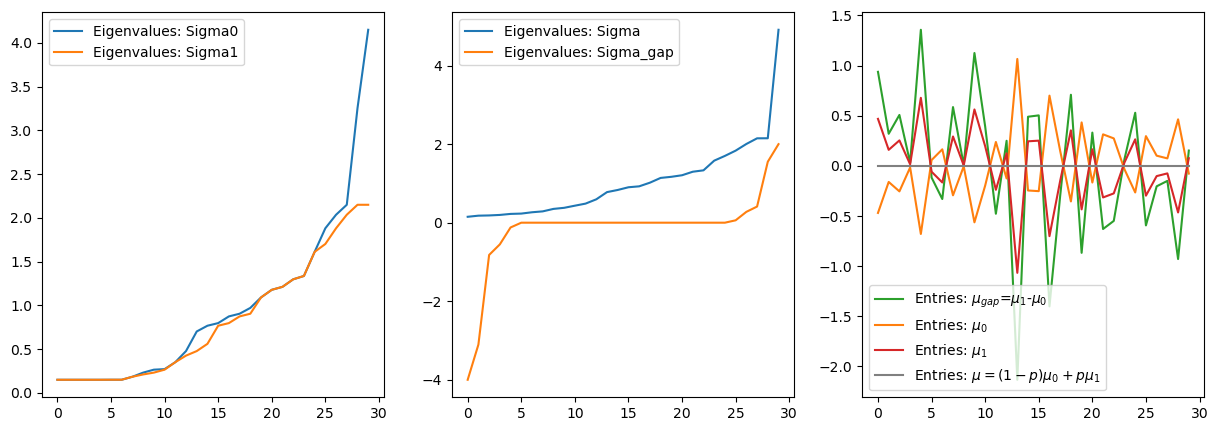

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

w0, _ = jnp.linalg.eigh(Algo.Sigma0)
w1, _ = jnp.linalg.eigh(Algo.Sigma1)
w, _ = jnp.linalg.eigh(Algo.Sigma)
wg, _ = jnp.linalg.eigh(Algo.Sigma_gap)

ax[0].plot(w0, label='Eigenvalues: Sigma0')
ax[0].plot(w1, label='Eigenvalues: Sigma1')
ax[0].legend()
ax[1].plot(w, label='Eigenvalues: Sigma')
ax[1].plot(wg,label='Eigenvalues: Sigma_gap')
ax[1].legend()
ax[2].plot(Algo.mu_gap, c='tab:green', label='Entries: $\mu_{gap}$=$\mu_1$-$\mu_0$')
ax[2].plot(Algo.mu0, c='tab:orange', label='Entries: $\mu_0$')
ax[2].plot(Algo.mu1, c='tab:red', label='Entries: $\mu_1$')
ax[2].plot(Algo.mu, c='gray', label='Entries: $\mu=(1-p)\mu_0 + p\mu_1$')
ax[2].legend()

In [22]:
# unfair_pc_score = [(jnp.linalg.norm(Algo.eigvec_Sigma[:,-i-1] @ Algo.eigvec_Q_hat[:,-1:]), i) for i in range(Algo.d)]
# max(unfair_pc_score, key=lambda x: x[0])
# sorted(unfair_pc_score, key=lambda x: -x[0])[:12]

In [23]:
# n_samples = 1000
# Data = [[], []]
# while len(Data[0]) < n_samples and len(Data[1]) < n_samples:
#     s, data = Algo.sample()
#     if len(Data[s]) < n_samples:
#         Data[s].append(data)

# n_samples = 300
# Data = [[], []]
# for _ in range(n_samples):
#     s, data = Algo.sample()
#     Data[s].append(data)


In [24]:
# %matplotlib inline

# plt.figure()
# ax = plt.subplot(111,projection='3d')
# X0,Y0,Z0 = jnp.stack(Data[0], 1)[:3]
# X1,Y1,Z1 = jnp.stack(Data[1], 1)[:3]
# ax.scatter(X0,Y0,Z0, alpha=0.4)
# ax.scatter(X1,Y1,Z1, alpha=0.4)

# X2 = jnp.linspace(-10,10, 200)
# Y2 = 2 * X2
# Z2 = 0 * X2
# Data.append(zip(X2,Y2,Z2))
# Data[2] = list(map(jnp.stack, Data[2]))
# ax.scatter(X2,Y2,Z2)
# plt.show()

## Offline Training

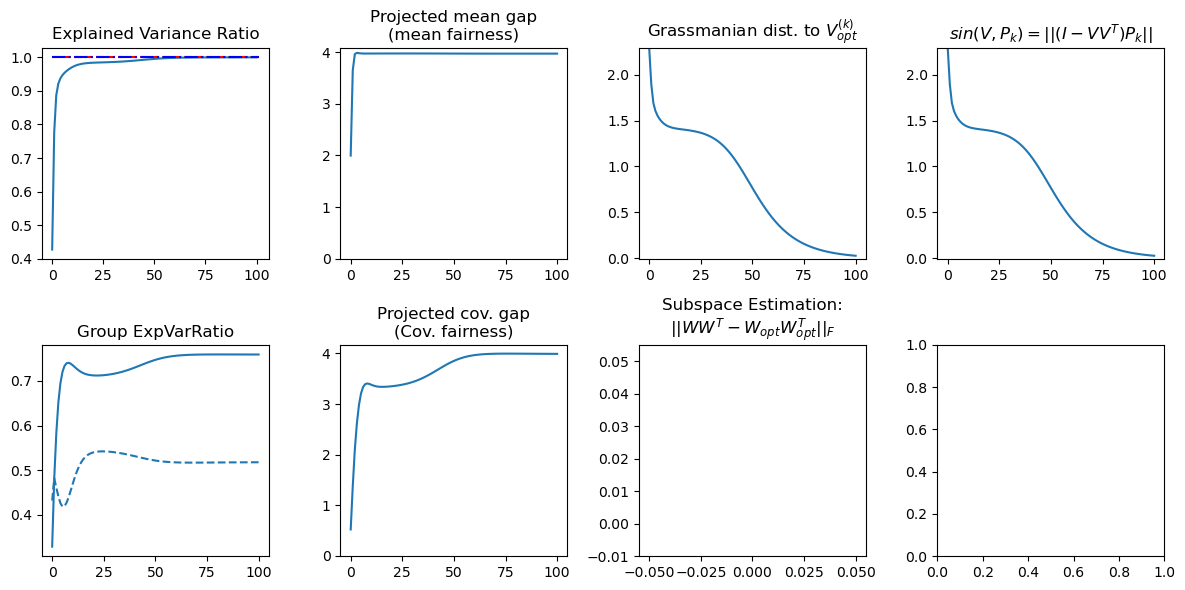

In [25]:
n_iter = 100
Algo.offline_train(
    target_dim=3,
    rank=1,
    n_iter=n_iter,
    n_iter_inner=n_iter,
    lr=1,
    pca_optimization='pm',
    constraint='vanilla',
    # seed=0,
)
fig, axes = Algo.plot_buffer(save=None);  # semicolon
# Algo.plot_buffer(save=None, fig=fig, axes=axes); 
# fig

In [26]:
if Algo.k == 2:
    X_vanilla, Y_vanilla = [[],[]], [[],[]]
    # X_vanilla, Y_vanilla = [[],[],[]], [[],[],[]]
    for s in range(2):
        for data in Data[s]:
            x, y = Algo.transform_low_dimension(data)
            X_vanilla[s].append(x)
            Y_vanilla[s].append(y)

    plt.figure(figsize=(5,5))
    plt.scatter(X_vanilla[0],Y_vanilla[0], label='Group 0', alpha=0.5)
    plt.scatter(X_vanilla[1],Y_vanilla[1], label='Group 1', alpha=0.5)
    # plt.scatter(X_vanilla[2],Y_vanilla[2], label='Group 2', alpha=0.5)
    plt.legend()
    # plt.xlim(-5,5)
    # plt.ylim(-5,5)

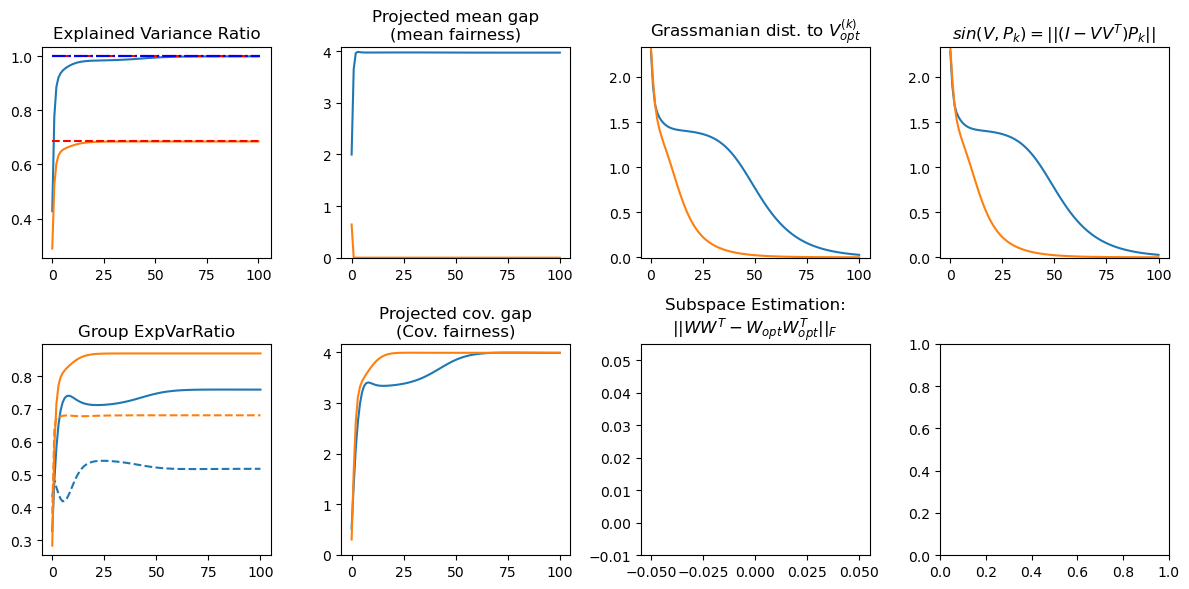

In [27]:
n_iter=100
Algo.offline_train(
    target_dim=3,
    rank=0,
    n_iter=n_iter,
    n_iter_inner=n_iter,
    lr=1,
    pca_optimization='pm',
    constraint='mean',
    seed=0,
)
# fig, axes = Algo.plot_buffer(save=None); 
Algo.plot_buffer(save=None, fig=fig, axes=axes); fig

In [28]:
if Algo.k == 2:
    X_mean, Y_mean = [[],[]], [[],[]]
    # X_mean, Y_mean = [[],[],[]], [[],[],[]]
    for s in range(2):
        for data in Data[s]:
            x, y = Algo.transform_low_dimension(data)
            X_mean[s].append(x)
            Y_mean[s].append(y)

    plt.figure(figsize=(5,5))
    plt.scatter(X_mean[0],Y_mean[0], label='Group 0', alpha=0.5)
    plt.scatter(X_mean[1],Y_mean[1], label='Group 1', alpha=0.5)
    # plt.scatter(X_mean[2],Y_mean[2], label='Group 1', alpha=0.5)
    plt.legend()
    # plt.xlim(-5,5)
    # plt.ylim(-5,5)

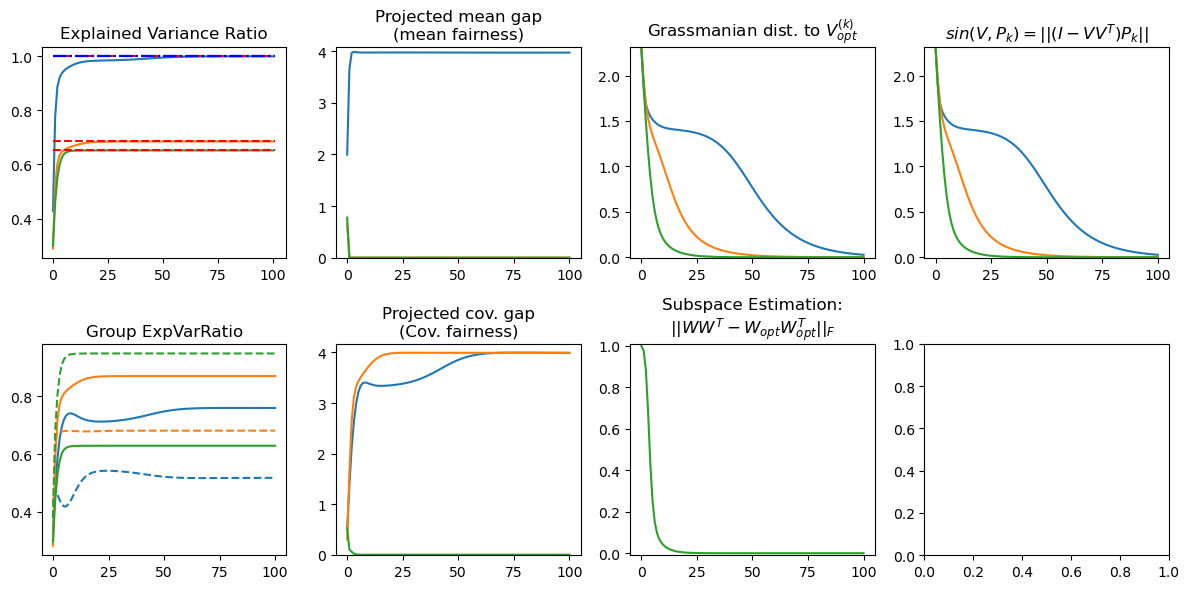

In [29]:
Algo.offline_train(
    target_dim=3,
    rank=3,
    n_iter=100,
    n_iter_inner=100,
    lr=None,
    pca_optimization='pm',
    constraint='all',
    seed=0,
)
# fig, axes = Algo.plot_buffer(save=None); 
Algo.plot_buffer(save=None, fig=fig, axes=axes); fig

In [30]:
if Algo.k == 2:
    X_all, Y_all = [[],[]], [[],[]]
    # X_all, Y_all = [[],[],[]], [[],[],[]]
    for s in range(2):
        for data in Data[s]:
            x, y = Algo.transform_low_dimension(data)
            X_all[s].append(x)
            Y_all[s].append(y)


    plt.scatter(X_all[0],Y_all[0], label='Group 0', alpha=0.5)
    plt.scatter(X_all[1],Y_all[1], label='Group 1', alpha=0.5)
    # plt.scatter(X_all[2],Y_all[2], label='Group 2')
    plt.legend()
    # plt.xlim(-5,5)
    # plt.ylim(-5,5)
    plt.show()

In [31]:
if Algo.k == 2:
    # Scatter plots in one figure
    fig_all, axes_all = plt.subplots(1,3, figsize=(16,4))

    # axes_all[0] = plt.subplot(141, projection='3d')
    # ax = axes_all[0]
    # X0,Y0,Z0 = zip(*Data[0])
    # X1,Y1,Z1 = zip(*Data[1])
    # ax.scatter(X0,Y0,Z0, label='Group 0')
    # ax.scatter(X1,Y1,Z1, label='Group 1')
    alpha=0.5

    ax = axes_all[0]
    ax.scatter(X_vanilla[0],Y_vanilla[0], label='Group 0', alpha=alpha)
    ax.scatter(X_vanilla[1],Y_vanilla[1], label='Group 1', alpha=alpha)
    ax.legend()
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.set_title('Vanilla PCA', weight='bold')

    ax = axes_all[1]
    ax.scatter(X_mean[0],Y_mean[0], label='Group 0', alpha=alpha)
    ax.scatter(X_mean[1],Y_mean[1], label='Group 1', alpha=alpha)
    ax.legend()
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.set_title('Mean-matched PCA', weight='bold')

    ax = axes_all[2]
    ax.scatter(X_all[0],Y_all[0], label='Group 0', alpha=alpha)
    ax.scatter(X_all[1],Y_all[1], label='Group 1', alpha=alpha)
    ax.legend()
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.set_title('Mean&Cov-Fair PCA', weight='bold')

## Online - Fair PCA

  0%|          | 0/25 [00:00<?, ?it/s]

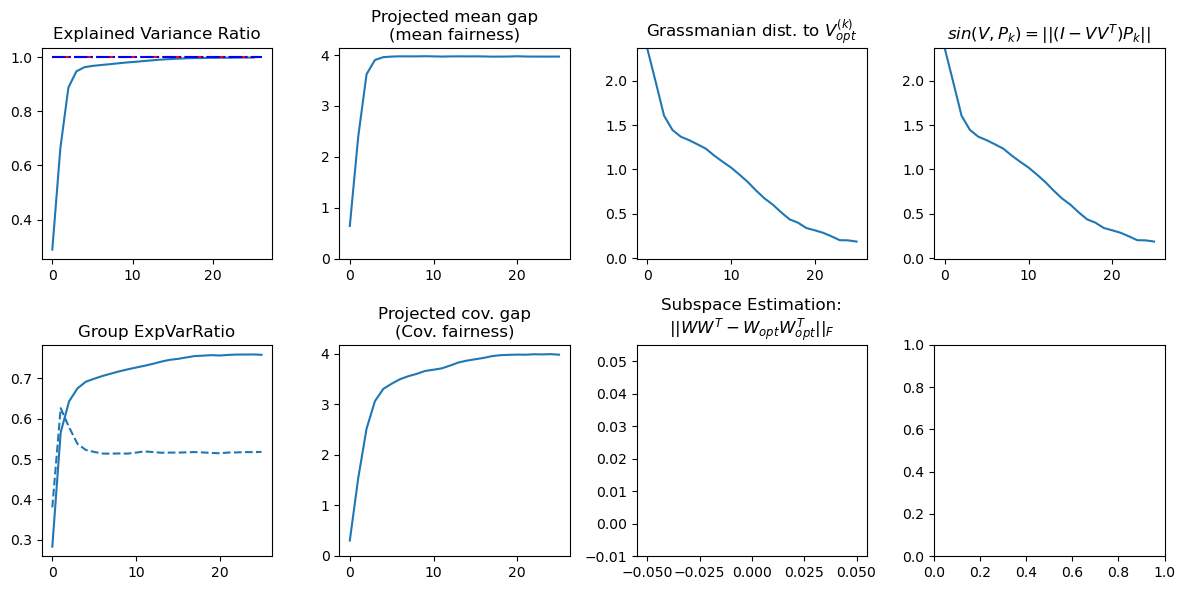

In [32]:
n_iter = 25
Algo.train(
    target_dim=3,
    rank=0,
    n_iter=n_iter,
    n_iter_inner=n_iter,
    batch_size_subspace=None,
    batch_size_pca=10000,
    constraint='vanilla', # unfair
    subspace_optimization=None,
    pca_optimization='npm',
    lr_pca=None,
    seed=0,
    verbose=True,
    # lr_scheduler=lambda t: 0.998**(t-1)
)
fig, axes = Algo.plot_buffer(save=None);  # semicolon
# Algo.plot_buffer(save=None, fig=fig, axes=axes); fig

In [33]:
# if Algo.k == 2:
#     X_vanilla, Y_vanilla = [[],[]], [[],[]]
#     for s in range(2):
#         for data in Data[s]:
#             x, y = Algo.transform_low_dimension(data)
#             X_vanilla[s].append(x)
#             Y_vanilla[s].append(y)

#     plt.scatter(X_vanilla[0],Y_vanilla[0], label='Group 0', alpha=0.9)
#     plt.scatter(X_vanilla[1],Y_vanilla[1], label='Group 1', alpha=0.9)
#     plt.legend()
#     plt.xlim(-5,5)
#     plt.ylim(-5,5)

In [34]:
# n_iter = 100
# Algo.train(
#     target_dim=3,
#     rank=0,
#     n_iter=n_iter,
#     n_iter_inner=n_iter,
#     batch_size_subspace=1000,
#     batch_size_pca=1000,
#     constraint='mean', # unfair
#     subspace_optimization='npm',
#     pca_optimization='npm',
#     lr_pca=None,
#     seed=0,
#     verbose=True,
#     # lr_scheduler=lambda t: 0.998**(t-1)
# )
# # fig, axes = Algo.plot_buffer(save=None);  # semicolon
# Algo.plot_buffer(save=None, fig=fig, axes=axes); fig

In [35]:
# if Algo.k == 2:
#     X_mean, Y_mean = [[],[]], [[],[]]
#     for s in range(2):
#         for data in Data[s]:
#             x, y = Algo.transform_low_dimension(data)
#             X_mean[s].append(x)
#             Y_mean[s].append(y)


#     plt.scatter(X_mean[0],Y_mean[0], label='Group 0')
#     plt.scatter(X_mean[1],Y_mean[1], label='Group 1')
#     plt.legend()
#     plt.xlim(-5,5)
#     plt.ylim(-5,5)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

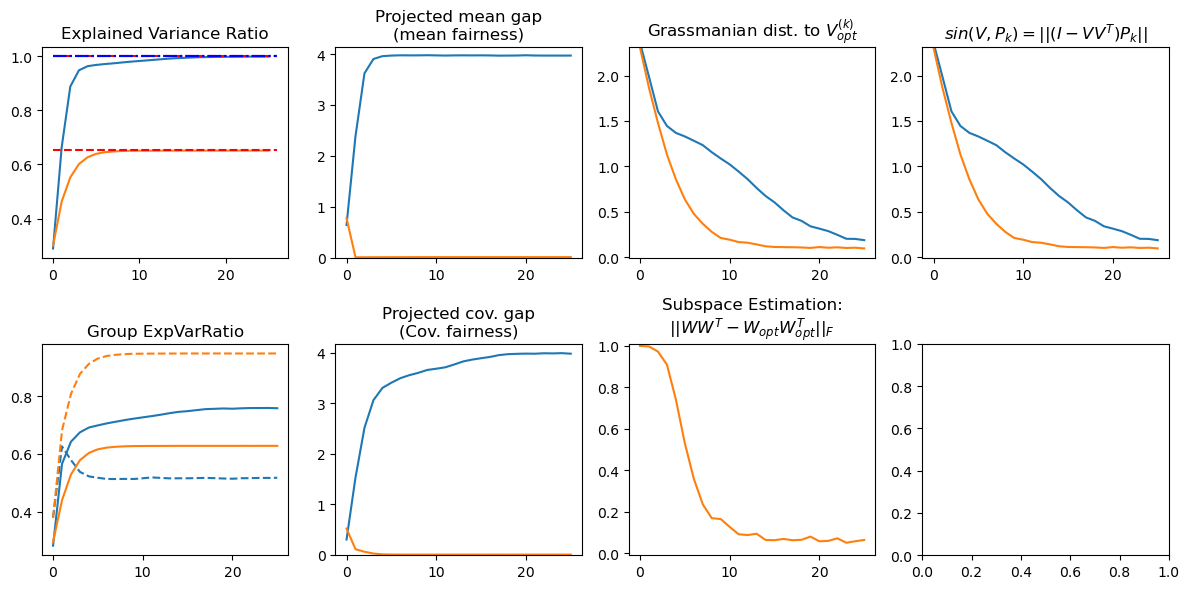

In [36]:
Algo.train(
    target_dim=3,
    rank=3,
    n_iter=25,
    n_iter_inner=25,
    batch_size_subspace=10000,
    batch_size_pca=10000,
    constraint='all',
    subspace_optimization='npm',
    pca_optimization='npm',
    lr_pca=None,
    seed=0,
    verbose=True,
    # lr_scheduler=lambda t: 0.998**(t-1)
    use_true_N=False
)
# fig, axes = Algo.plot_buffer(save=None);  # semicolon
Algo.plot_buffer(save=None, fig=fig, axes=axes); fig

In [37]:
# if Algo.k == 2:
#     X_all, Y_all = [[],[]], [[],[]]
#     for s in range(2):
#         for data in Data[s]:
#             x, y = Algo.transform_low_dimension(data)
#             X_all[s].append(x)
#             Y_all[s].append(y)


#     plt.scatter(X_all[0],Y_all[0], label='Group 0')
#     plt.scatter(X_all[1],Y_all[1], label='Group 1')
#     plt.legend()
#     plt.xlim(-5,5)
#     plt.ylim(-5,5)

In [38]:
# if Algo.k == 2:
#     # Scatter plots in one figure
#     fig_all, axes_all = plt.subplots(1,3, figsize=(16,4))

#     # axes_all[0] = plt.subplot(141, projection='3d')
#     # ax = axes_all[0]
#     # X0,Y0,Z0 = zip(*Data[0])
#     # X1,Y1,Z1 = zip(*Data[1])
#     # ax.scatter(X0,Y0,Z0, label='Group 0')
#     # ax.scatter(X1,Y1,Z1, label='Group 1')
#     alpha=0.5

#     ax = axes_all[0]
#     ax.scatter(X_vanilla[0],Y_vanilla[0], label='Group 0', alpha=alpha)
#     ax.scatter(X_vanilla[1],Y_vanilla[1], label='Group 1', alpha=alpha)
#     ax.legend()
#     ax.set_xlim(-10,10)
#     ax.set_ylim(-10,10)
#     ax.set_title('Vanilla PCA', weight='bold')

#     ax = axes_all[1]
#     ax.scatter(X_mean[0],Y_mean[0], label='Group 0', alpha=alpha)
#     ax.scatter(X_mean[1],Y_mean[1], label='Group 1', alpha=alpha)
#     ax.legend()
#     ax.set_xlim(-10,10)
#     ax.set_ylim(-10,10)
#     ax.set_title('Mean-matched PCA', weight='bold')

#     ax = axes_all[2]
#     ax.scatter(X_all[0],Y_all[0], label='Group 0', alpha=alpha)
#     ax.scatter(X_all[1],Y_all[1], label='Group 1', alpha=alpha)
#     ax.legend()
#     ax.set_xlim(-10,10)
#     ax.set_ylim(-10,10)
#     ax.set_title('Fair PCA', weight='bold')